# BPE Tokenizer

In [50]:
npm = 2006596996  # TODO: isi NPM Anda

## 1. Training Tokenizer

In [51]:
# Install package tokenizers
# !pip install tokenizers==0.13.3

In [52]:
# Import semua packages yang diperlukan
import json
import random

from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

In [53]:
# Membuat tokenizer BPE dan trainer-nya
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(
    vocab_size=1000,
    special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"],
)

In [54]:
# Menambahkan pre-tokenizer yang berfungsi untuk memecah tiap kalimat/dokumen
# menjadi kumpulan kata berdasarkan keberadaan whitespace
tokenizer.pre_tokenizer = Whitespace()

In [55]:
# Load semua teks pada dataset training
def read_jsonl(path: str):
    dataset: list[dict[str,str]] = []
    with open(path, 'r') as file:
        for line in file:
            dataset.append(json.loads(line))
    return dataset
training_dataset = read_jsonl("train.jsonl")

In [56]:
# Melatih tokenizer dengan kumpulan teks dari dataset training
tokenizer.train_from_iterator(
    iterator=[data["text"] for data in training_dataset],
    trainer=trainer,
)



In [57]:
# Contoh melakukan tokenisasi suatu kalimat
tokenizer.encode('Mata Kuliah Pengolahan Bahasa Manusia.').tokens

['M',
 'ata',
 'K',
 'ul',
 'i',
 'ah',
 'P',
 'eng',
 'ol',
 'ahan',
 'B',
 'ah',
 'asa',
 'M',
 'an',
 'usia',
 '.']

## 2. Testing Tokenizer

In [58]:
# Load sampel dari dataset testing sesuai NPM
random.seed(int(npm))
testing_dataset = random.sample(read_jsonl("test.jsonl"), 300)

In [59]:
# Load program akurasi yang Anda implementasikan
from akurasi import hitung_akurasi

In [60]:
tokenizer_tokens_list = []
gold_std_tokens_list = []
for data in testing_dataset:
    tokenizer_tokens_list.append(tokenizer.encode(data['text']).tokens)
    gold_std_tokens_list.append(data['tokens'])
hitung_akurasi(tokenizer_tokens_list,gold_std_tokens_list)

0.46

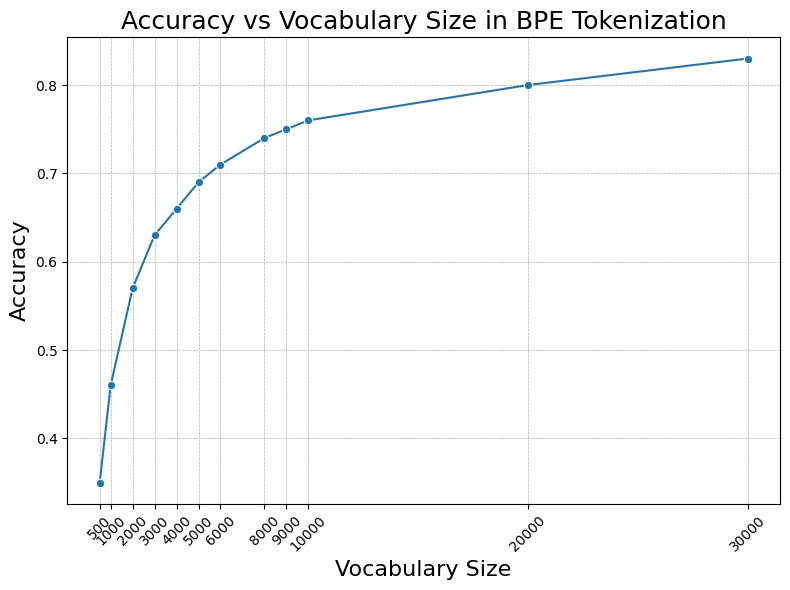

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = {
    'Vocabulary Size': [500, 1000, 2000, 3000, 4000, 5000, 6000,  8000, 9000, 10000, 20000, 30000],
            'Accuracy': [0.35, 0.46, 0.57, 0.63, 0.66, 0.69, 0.71,  0.74, 0.75, 0.76, 0.80, 0.83]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Vocabulary Size', y='Accuracy', marker='o')

# Add labels and title
plt.xlabel('Vocabulary Size', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy vs Vocabulary Size in BPE Tokenization', fontsize=18)

# Customize ticks for the x-axis
# Increase the number of ticks by defining a range and setting them explicitly
plt.xticks(ticks=df['Vocabulary Size'], rotation=45)

plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()